# Predicting in 48 Hours or Less

In [0]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

import numpy as np

## Data Mining and Extraction

In [0]:
url = 'https://en.wikipedia.org/wiki/Toilet_paper'
html = urlopen(url)

In [3]:
soup = BeautifulSoup(html, 'lxml')
type(soup)

bs4.BeautifulSoup

In [0]:
paragraphs = str(soup.find_all('p'))
cleantext = BeautifulSoup(paragraphs, "lxml").get_text()

In [5]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
stp = set(stopwords.words('english'))
for s in ['a', 'an', 'the']: stp.add(s)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
tokens = nltk.word_tokenize(cleantext)
tokens_no_punkt = [tok.lower() for tok in tokens if tok.isalpha() and tok.lower() not in stp]

In [7]:
len(tokens_no_punkt)

1398

In [0]:
import numpy as np

In [0]:
token_freq = dict([(tok, tokens_no_punkt.count(tok)) for tok in set(tokens_no_punkt)])

In [10]:
np.quantile(np.array(list(token_freq.values())), 0.25)

1.0

In [11]:
np.quantile(np.array(list(token_freq.values())), 0.95)

3.0

In [0]:
q_token_freq = dict([(k, int(np.log(v)) * 5 ** 2) for k, v in token_freq.items() if v > 2])

In [13]:
for k,v in q_token_freq.items():
  print('{word: \'%s\', size:\'%s\'},' % (str(k), str(v)))
  break

{word: 'light', size:'25'},


## Exploración y Visualización de Datos

In [15]:
!rm -rf predicting_in_48 
!git clone https://github.com/LewisErick/predicting_in_48.git

Cloning into 'predicting_in_48'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 15 (delta 5), reused 10 (delta 3), pack-reused 0
Unpacking objects: 100% (15/15), done.


In [0]:
import pandas as pd

In [0]:
raw_df = pd.read_csv('predicting_in_48/raw_data.csv', index_col=0)

In [18]:
raw_df.head()

,quarantine_day,infected,deceased,news_freq,grocery_store_1,grocery_store_2,grocery_store_3,avg_cars_per_day
0,0,6,0,0,5000,500,5000,24597
1,1,7,0,0,4936,493,4974,23273
2,2,7,0,0,4873,487,4949,22972
3,3,8,1,0,4811,481,4924,22803
4,4,8,1,0,4748,474,4899,21237


In [19]:
raw_df.sample(frac=1).head()

,quarantine_day,infected,deceased,news_freq,grocery_store_1,grocery_store_2,grocery_store_3,avg_cars_per_day
40,40,119,11,1,2672,267,4005,4129
9,9,12,2,0,4435,443,4773,19240
48,48,198,15,1,2296,229,3813,459
119,120,981,110,3,474,47,2314,12565
10,10,13,2,1,4373,437,4748,19118


In [20]:
raw_df.describe(include='all')

,quarantine_day,infected,deceased,news_freq,grocery_store_1,grocery_store_2,grocery_store_3,avg_cars_per_day
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,59.508333,442.241667,33.058333,1.250000,2152.975000,214.866667,3582.300000,10307.325000
std,34.799545,374.072859,30.885611,1.055199,1352.575312,135.234557,792.512753,5638.813836
min,0.000000,6.000000,0.000000,0.000000,474.000000,47.000000,2314.000000,-290.000000
25%,29.750000,58.750000,7.000000,0.000000,952.750000,94.500000,2889.750000,6067.000000
50%,59.500000,370.000000,22.500000,1.000000,1824.000000,182.000000,3542.500000,11095.000000
75%,89.250000,846.500000,52.500000,2.000000,3207.750000,320.250000,4255.250000,12741.500000
max,120.000000,981.000000,110.000000,3.000000,5000.000000,500.000000,5000.000000,24597.000000


In [0]:
import matplotlib.pyplot as plt

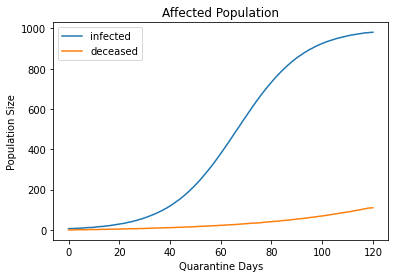

In [22]:
# Plot infected and deceased.
plt.plot(raw_df['quarantine_day'].values.ravel(), raw_df['infected'].values.ravel(), label='infected')
plt.plot(raw_df['quarantine_day'].values.ravel(), raw_df['deceased'].values.ravel(), label='deceased')
plt.title('Affected Population')
plt.xlabel('Quarantine Days')
plt.ylabel('Population Size')
plt.legend()
plt.show()

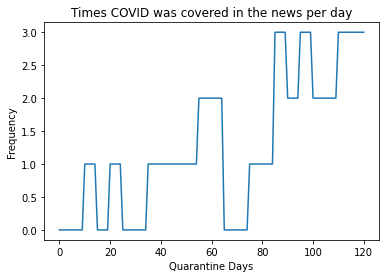

In [23]:
# Plot COVID topic frequency in the news channel
plt.plot(raw_df['quarantine_day'].values.ravel(), raw_df['news_freq'].values.ravel())
plt.title('Times COVID was covered in the news per day')
plt.xlabel('Quarantine Days')
plt.ylabel('Frequency')
plt.show()

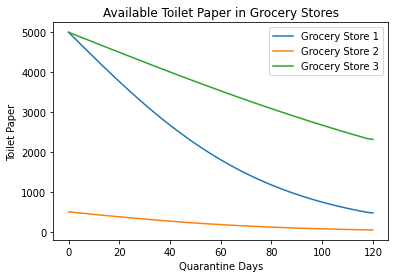

In [24]:
# Plot grocery stores
plt.plot(raw_df['quarantine_day'].values.ravel(), raw_df['grocery_store_1'].values.ravel(), label='Grocery Store 1')
plt.plot(raw_df['quarantine_day'].values.ravel(), raw_df['grocery_store_2'].values.ravel(), label='Grocery Store 2')
plt.plot(raw_df['quarantine_day'].values.ravel(), raw_df['grocery_store_3'].values.ravel(), label='Grocery Store 3')
plt.title('Available Toilet Paper in Grocery Stores')
plt.xlabel('Quarantine Days')
plt.ylabel('Toilet Paper')
plt.legend()
plt.show()

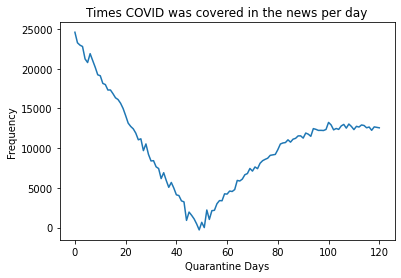

In [25]:
# Plot cars.
plt.plot(raw_df['quarantine_day'].values.ravel(), raw_df['avg_cars_per_day'].values.ravel())
plt.title('Times COVID was covered in the news per day')
plt.xlabel('Quarantine Days')
plt.ylabel('Frequency')
plt.show()

## Feature Engineering

In [0]:
# Initialize resulting processed df.
# I usually include raw columns, just in case.
proc_df = raw_df

In [0]:
panic_ratio_ = deceased/inf÷(deceased+1)
infected = raw_df['infected'].values.ravel()
deceased = raw_df['deceased'].values.ravel()

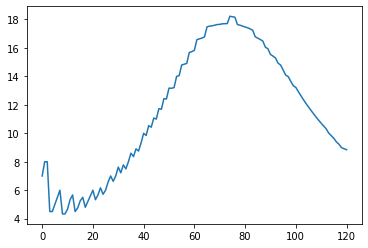

In [118]:
plt.plot(raw_df['quarantine_day'].values.ravel(), panic_ratio)
plt.show()

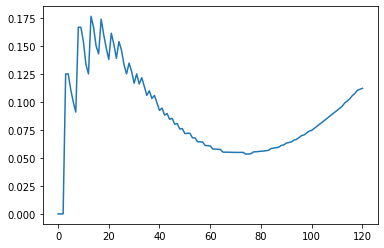

In [119]:
plt.plot(raw_df['quarantine_day'].values.ravel(), panic_ratio_)
plt.show()

In [0]:
proc_df['panic_ratio'] = panic_ratio

In [0]:
 g1 = raw_df['grocery_store_1'].values.ravel()
 g2 = raw_df['grocery_store_2'].values.ravel()
 g3 = raw_df['grocery_store_3'].values.ravel()
 groceries = (g1 + g2 + g3) / 3

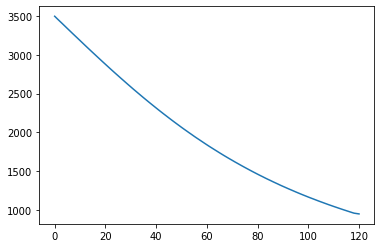

In [31]:
plt.plot(raw_df['quarantine_day'].values.ravel(), groceries)
plt.show()

In [0]:
proc_df['avg_paper_availability'] = groceries

In [0]:
# Seudo moving average for COVID topic popularity in the news
k = 10
current_vals = raw_df['news_freq'].values.ravel()
seudo_avg_news = [np.mean(current_vals[i:i+k]) for i in range(len(current_vals))]

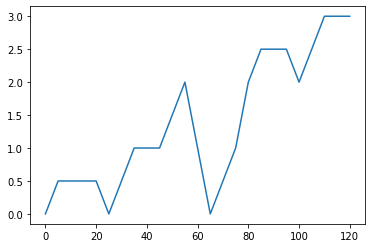

In [34]:
plt.plot(raw_df['quarantine_day'].values.ravel(), seudo_avg_news)
plt.show()

In [0]:
proc_df['news_covid_popularity'] = seudo_avg_news

In [0]:
# Reduce noise of cars with moving average.
k = 20
cars = raw_df['avg_cars_per_day'].values.ravel()
cars_smoothed = [np.mean(cars[i:i+k]) for i in range(len(cars))]

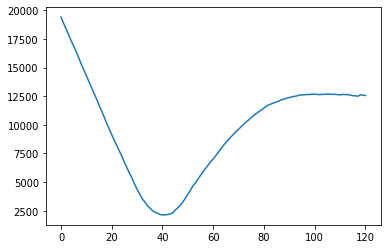

In [37]:
plt.plot(raw_df['quarantine_day'].values.ravel(), cars_smoothed)
plt.show()

In [0]:
proc_df['avg_cars_outside'] = cars_smoothed

In [0]:
eng_features = [
'quarantine_day',
'panic_ratio',
'avg_paper_availability',
'news_covid_popularity',
'avg_cars_outside',
]

In [0]:
label = 'sales'

In [0]:
sales_df = pd.read_csv('predicting_in_48/sales_data.csv', index_col=0).astype(int)

In [42]:
sales_df.head()

,day,sales
0,0,6622
1,1,6961
2,2,7316
3,3,7690
4,4,8083


In [0]:
corr_df = proc_df
corr_df['sales'] = sales_df['sales']

In [44]:
corr_df.corr()['sales']

quarantine_day            0.932214
infected                  0.942108
deceased                  0.996840
news_freq                 0.774960
grocery_store_1          -0.835765
grocery_store_2          -0.835888
grocery_store_3          -0.915153
avg_cars_per_day          0.109992
panic_ratio               0.334860
avg_paper_availability   -0.866116
news_covid_popularity     0.880110
avg_cars_outside          0.410718
sales                     1.000000
Name: sales, dtype: float64

## Training

In [0]:
X = proc_df[eng_features]

In [0]:
y = sales_df[label]

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)

In [0]:
from sklearn.linear_model import LinearRegression

In [93]:
X_train.head()

,quarantine_day,panic_ratio,avg_paper_availability,news_covid_popularity,cars_1/y^3
39,39,9.333333,2341.000000,1.0,9.750585e-11
13,13,4.500000,3092.333333,0.5,4.817715e-13
91,91,15.428571,1287.000000,2.5,5.192125e-13
0,0,7.000000,3500.000000,0.0,1.370048e-13
79,79,17.536585,1475.666667,1.8,6.913235e-13


In [94]:
print(np.max(X_train.values.ravel()))

3500.0


In [0]:
sales_reg = LinearRegression().fit(X_train.values, y_train.values)

In [96]:
train_score = sales_reg.score(X_train.values, y_train.values)
test_score = sales_reg.score(X_test.values, y_test.values)
print('Train score: %f Test score: %f' % (train_score, test_score))

Train score: 0.999685 Test score: 0.998952


In [0]:
next_days = [i for i in range(121, 241)]

In [98]:
pred_df_dict = {}
pred_df_dict['quarantine_day'] = next_days
for f in eng_features:
  if f == 'quarantine_day':
    continue
  reg_f = LinearRegression().fit(X_train['quarantine_day'].values.reshape(-1, 1), X_train[f].values.reshape(-1, 1))
  train_score = reg_f.score(X_train['quarantine_day'].values.reshape(-1, 1), X_train[f].values.reshape(-1, 1))
  test_score = reg_f.score(X_test['quarantine_day'].values.reshape(-1, 1), X_test[f].values.reshape(-1, 1))
  print('%s: Train score %f Test Score: %f' % (f, train_score, test_score))
  pred_df_dict[f] = reg_f.predict(np.array(next_days).reshape(-1, 1)).ravel()

panic_ratio: Train score 0.486916 Test Score: 0.156124
avg_paper_availability: Train score 0.979466 Test Score: 0.970037
news_covid_popularity: Train score 0.776327 Test Score: 0.689092
cars_1/y^3: Train score 0.041956 Test Score: 0.073841


In [99]:
pred_df = pd.DataFrame(pred_df_dict)
pred_df.head()

,quarantine_day,panic_ratio,avg_paper_availability,news_covid_popularity,cars_1/y^3
0,121,17.195560,639.124366,2.863794,1.727814e-12
1,122,17.288182,617.223681,2.887251,1.573912e-12
2,123,17.380803,595.322995,2.910709,1.420009e-12
3,124,17.473425,573.422310,2.934166,1.266107e-12
4,125,17.566047,551.521625,2.957624,1.112205e-12


In [0]:
pred_results = sales_reg.predict(pred_df.values).ravel()
pred_sales = [None for i in range(120)]
for r in pred_results:
  pred_sales.append(r)

In [0]:
current_sales = sales_df['sales'].values.ravel()
current_sales = list(current_sales)
for i in range(120):
  current_sales.append(None)

In [102]:
len(current_sales)

240

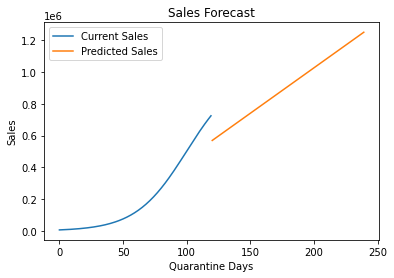

In [103]:
total_quarantine_days = [i for i in range(240)]
plt.plot(total_quarantine_days, current_sales, label='Current Sales')
plt.plot(total_quarantine_days, pred_sales, label='Predicted Sales')
plt.title('Sales Forecast')
plt.xlabel('Quarantine Days')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [0]:
real_sales = pd.read_csv('predicting_in_48/real_sales_data.csv', index_col=0)['sales'].values.ravel()

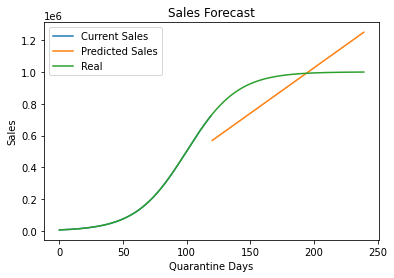

In [105]:
total_quarantine_days = [i for i in range(240)]
plt.plot(total_quarantine_days, current_sales, label='Current Sales')
plt.plot(total_quarantine_days, pred_sales, label='Predicted Sales')
plt.plot(total_quarantine_days, real_sales, label='Real')
plt.title('Sales Forecast')
plt.xlabel('Quarantine Days')
plt.ylabel('Sales')
plt.legend()
plt.show()

## Evaluations and Improvement

In [0]:
# Pruning or improving feature engineering

In [0]:
eng_features = [
'quarantine_day',
'panic_ratio',
'avg_paper_availability',
'news_covid_popularity',
]

In [0]:
# Reduce noise of cars with moving average.
cars = proc_df['avg_cars_outside'].values.ravel()

Ladder of Transformations
- y^3
- y^2
- y
- √y
- log y
- y^-1
- y^-2
- y^-3

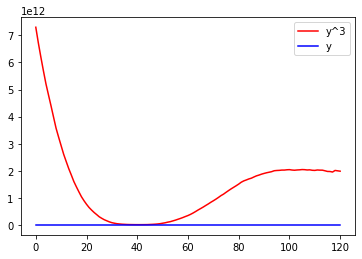

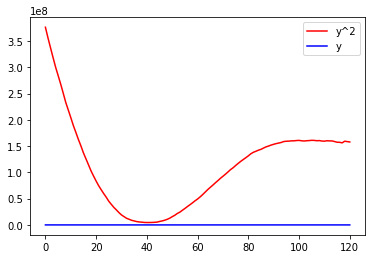

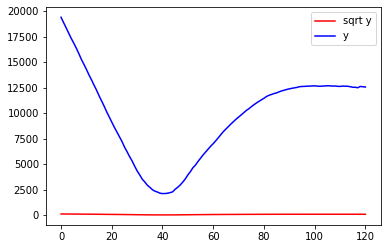

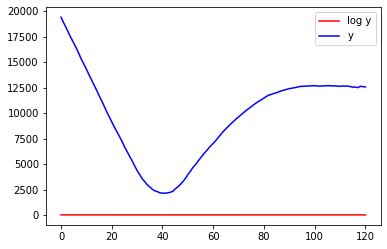

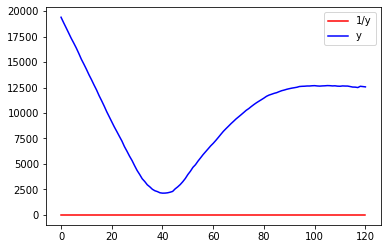

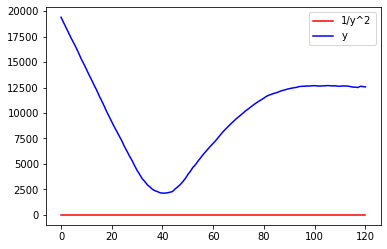

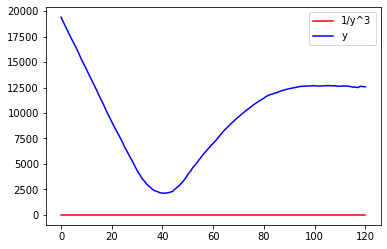

In [84]:
ladder = {
          'y^3': cars ** 3,
          'y^2': cars ** 2,
          'sqrt y': np.sqrt(cars),
          'log y': np.log(cars),
          '1/y': cars ** -1,
          '1/y^2': cars ** -2,
          '1/y^3': cars ** -3
}
quarantine_days = raw_df['quarantine_day'].values.ravel()
for k, l in ladder.items():
  plt.figure()
  plt.plot(quarantine_days, l, label=k, color='red')
  plt.plot(quarantine_days, cars, label='y', color='blue')
  plt.legend()
plt.show()

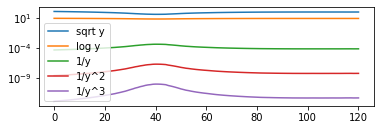

In [85]:
ladder = {
          'sqrt y': np.sqrt(cars),
          'log y': np.log(cars),
          '1/y': cars ** -1,
          '1/y^2': cars ** -2,
          '1/y^3': cars ** -3
}
quarantine_days = raw_df['quarantine_day'].values.ravel()
fig = plt.figure()
ax = fig.add_subplot(2, 1, 1)
for k, l in ladder.items():
  plt.plot(quarantine_days, l, label=k)
  plt.legend()
ax.set_yscale('log')
plt.show()

In [0]:
proc_df['cars_1/y^3'] = ladder['1/y^3']

In [0]:
eng_features = [
'quarantine_day',
'panic_ratio',
'avg_paper_availability',
'news_covid_popularity',
'cars_1/y^3',
]

In [0]:
# Hyperparameter tuning
log_reg_params = [
    {'normalize': True},
    {'normalize': False},
]

In [0]:
from itertools import permutations 

features = set(proc_df.columns)
features.remove('sales')
features = list(features)

feature_permutations = permutations(features, 2)

In [0]:
X = proc_df

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)

In [0]:
from IPython.display import clear_output

In [111]:
best_test_score = 0
best_model = None
for p in feature_permutations:
  p_features = list(p)
  if len(p_features) > 0:
    for param in log_reg_params:
      sales_reg = LinearRegression(normalize=param['normalize']).fit(X_train[p_features].values, y_train.values)
      train_score = sales_reg.score(X_train[p_features].values, y_train.values)
      test_score = sales_reg.score(X_test[p_features].values, y_test.values)
      clear_output(wait=True)
      if test_score > best_test_score:
        best_test_score = best_test_score
        best_model = sales_reg
      print('Train score: %f Test score: %f' % (train_score, test_score))

Train score: 0.666659 Test score: 0.662714


## Deployment

In [0]:
import pickle
pickle.dump(best_model, open('best_model.picke', 'wb'))
# Methods of Feature Engineering
pickle.dump(reg_panic, open('panic_model.pickle', 'wb')

References
- https://www.datacamp.com/community/tutorials/web-scraping-using-python